In [15]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
# seed 값 설정
seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)

In [17]:
from tensorflow.keras.datasets import fashion_mnist
fashion_mnist = keras.datasets.fashion_mnist

(X_train, Y_train), (X_test, Y_test) = \
    fashion_mnist.load_data()

In [18]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [19]:
X_train.shape,Y_train.shape

((60000, 28, 28), (60000,))

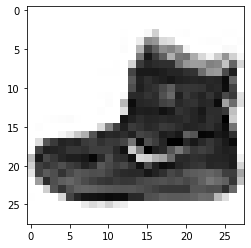

In [20]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [21]:
import sys
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	1	0	0	13	73	0	0	1	4	0	0	0	0	1	1	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	0	36	136	127	62	54	0	0	0	1	3	4	0	0	3	
0	0	0	0	0	0	0	0	0	0	0	0	6	0	102	204	176	134	144	123	23	0	0	0	0	12	10	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	155	236	207	178	107	156	161	109	64	23	77	130	72	15	
0	0	0	0	0	0	0	0	0	0	0	1	0	69	207	223	218	216	216	163	127	121	122	146	141	88	172	66	
0	0	0	0	0	0	0	0	0	1	1	1	0	200	232	232	233	229	223	223	215	213	164	127	123	196	229	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	183	225	216	223	228	235	227	224	222	224	221	223	245	173	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	193	228	218	213	198	180	212	210	211	213	223	220	243	202	0	
0	0	0	0	0	0	0	0	0	1	3	0	12	219	220	212	218	192	169	227	208	218	224	212	226	197	209	52	
0	0	0	0	0	0	0	0	0	0	6	0	99	244	222	220	218	203	198	221	215	213	222	220	245	119	167	56	
0	0	0	0	0	0	0	0	0	4	0	0	55	236	228	230	22

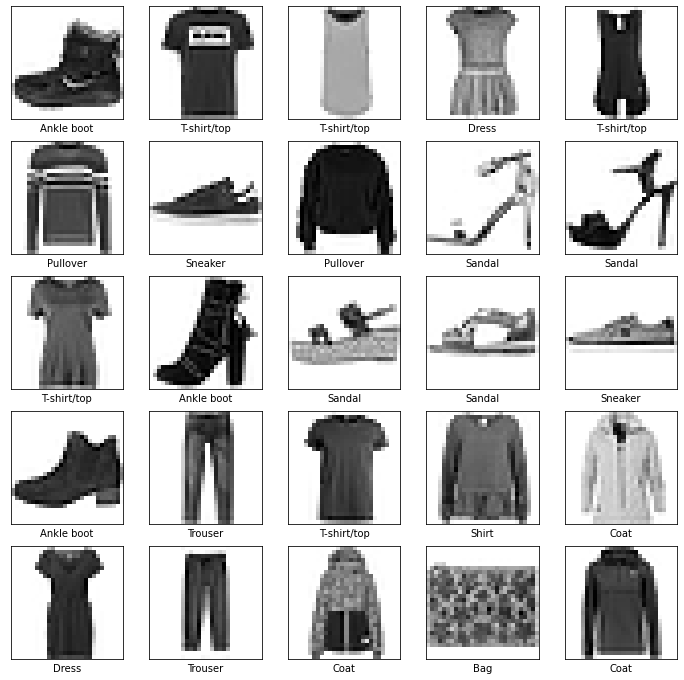

In [22]:
# 훈련 세트에서 처음 25개 이미지와 클래스 이름을 출력
plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[Y_train[i]])
plt.show()

In [23]:
X_train = X_train.reshape(-1,784)
X_train = X_train / 255
X_test = X_test.reshape(-1,784).astype('float64') / 255

In [24]:
X_train.shape,X_test.shape

((60000, 784), (10000, 784))

In [25]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import os 
import os
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [27]:
model = Sequential([
                    Dense(512,input_dim=784,activation='relu'),
                    Dense(10,activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(
    loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam'
)

In [29]:
modelpath = MODEL_DIR + "best{epoch:03d}-{val_loss:.4f}.hdf5"

In [30]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(patience=10)

In [31]:
history = model.fit(X_train,Y_train,validation_split=0.2,verbose=0,
                    epochs=30,batch_size=200,
                    callbacks=[checkpointer,early_stopping])


Epoch 00001: val_loss improved from inf to 0.43022, saving model to ./model/best001-0.4302.hdf5

Epoch 00002: val_loss improved from 0.43022 to 0.38068, saving model to ./model/best002-0.3807.hdf5

Epoch 00003: val_loss improved from 0.38068 to 0.37483, saving model to ./model/best003-0.3748.hdf5

Epoch 00004: val_loss improved from 0.37483 to 0.34302, saving model to ./model/best004-0.3430.hdf5

Epoch 00005: val_loss did not improve from 0.34302

Epoch 00006: val_loss did not improve from 0.34302

Epoch 00007: val_loss improved from 0.34302 to 0.31964, saving model to ./model/best007-0.3196.hdf5

Epoch 00008: val_loss improved from 0.31964 to 0.30652, saving model to ./model/best008-0.3065.hdf5

Epoch 00009: val_loss improved from 0.30652 to 0.30542, saving model to ./model/best009-0.3054.hdf5

Epoch 00010: val_loss improved from 0.30542 to 0.30143, saving model to ./model/best010-0.3014.hdf5

Epoch 00011: val_loss did not improve from 0.30143

Epoch 00012: val_loss did not improve f

In [32]:
from tensorflow.keras.models import load_model
best_model = load_model('./model/best010-0.3014.hdf5')
acc = best_model.evaluate(X_test, Y_test)
print(f"Accuracy: {acc[1]:.4f}")

313/313 [==============================] - 1s 2ms/step - loss: 0.3240 - accuracy: 0.8839
Accuracy: 0.8839


In [33]:
# 검증셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

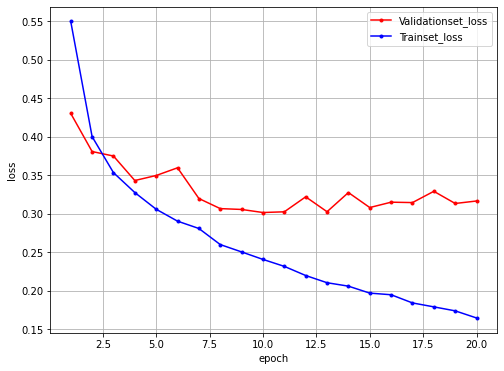

In [34]:
import numpy as np

# 그래프로 표현
x_len = np.arange(1, len(y_loss)+1)
plt.figure(figsize=(8,6))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Validationset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
#plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()